# Election 2023 forecasting

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)  

## Import libraries

In [1]:
import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker

import seaborn as sb
from scipy import stats

## Election information

After the polls close at 7pm on Election day, the Boulder County Clerk begins to publish batches of voting results for all the races: https://election.boco.solutions/ElectionResults2023C 

These batched results are released every 8-12 hours. We kept a spreadsheet of how the results changed across all the batches.

In [2]:
election_df = pd.read_csv('boulder_election_2023.csv')

election_df.columns = election_df.columns[:2].tolist() + pd.to_datetime(election_df.columns[2:],format='%m/%d/%y %H:%M').tolist()

election_df

,Race / Candidate,Race,2023-11-07 19:36:00,2023-11-07 20:47:00,2023-11-07 23:00:00,2023-11-08 00:50:00,2023-11-08 16:30:00,2023-11-08 22:00:00,2023-11-16 16:30:00
0,Aaron Brockett (First Round),Mayor - First Round,4801,6661,8207,9116,10290,11347,11504
1,Nicole Speer (First Round),Mayor - First Round,2408,3309,4065,4627,5404,6271,6369
2,Bob Yates (First Round),Mayor - First Round,7414,9479,11250,12190,13186,14087,14271
3,Paul Tweedlie (First Round),Mayor - First Round,291,372,473,553,637,729,749
4,Aaron (Second Round),Mayor - Second Round,6747,9370,11576,12957,14806,16580,16823
5,Bob (Second Round),Mayor - Second Round,7975,10209,12124,13178,14309,15382,15592
6,Tara Winer,City Council,10418,13608,16290,17803,19467,20970,21255
7,Ryan Schuchard,City Council,6056,8363,10217,11372,12860,14215,14412
8,Taishya Adams,City Council,6061,8358,10253,11422,12997,14448,14634
9,Terri Brncic,City Council,7278,9385,11157,12167,13199,14173,14365


Filter to City Council races.

In [3]:
boulder_cc_df = election_df[election_df['Race'].str.contains('City Council')]
boulder_cc_df

,Race / Candidate,Race,2023-11-07 19:36:00,2023-11-07 20:47:00,2023-11-07 23:00:00,2023-11-08 00:50:00,2023-11-08 16:30:00,2023-11-08 22:00:00,2023-11-16 16:30:00
6,Tara Winer,City Council,10418,13608,16290,17803,19467,20970,21255
7,Ryan Schuchard,City Council,6056,8363,10217,11372,12860,14215,14412
8,Taishya Adams,City Council,6061,8358,10253,11422,12997,14448,14634
9,Terri Brncic,City Council,7278,9385,11157,12167,13199,14173,14365
10,Tina Marquis,City Council,7838,10051,11867,12862,13839,14769,14959
11,Waylon Lewis,City Council,3860,5244,6353,7068,7928,8745,8863
12,Jenny Robins,City Council,5912,7507,8801,9546,10310,11077,11247
13,Silas Atkins,City Council,2464,3560,4416,4985,5857,6719,6831
14,Jacques Decalo,City Council,1389,1854,2281,2549,2905,3277,3329
15,Aaron Neyer,City Council,1293,1804,2268,2563,3000,3432,3484


Identify date columns.

In [4]:
date_cols = election_df.columns[2:].tolist()
date_cols

[Timestamp('2023-11-07 19:36:00'),
 Timestamp('2023-11-07 20:47:00'),
 Timestamp('2023-11-07 23:00:00'),
 Timestamp('2023-11-08 00:50:00'),
 Timestamp('2023-11-08 16:30:00'),
 Timestamp('2023-11-08 22:00:00'),
 Timestamp('2023-11-16 16:30:00')]

## Visualize

Visualize returns over time.

(4000.0, 22000.0)

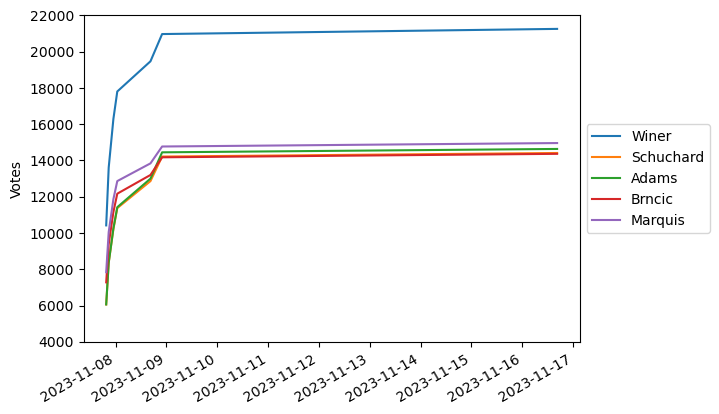

In [5]:
vote_count_df = election_df.loc[[6,7,8,9,10],date_cols].T

vote_count_df.index = pd.to_datetime(vote_count_df.index)

vote_count_df.columns = ['Winer','Schuchard','Adams','Brncic','Marquis']

ax = vote_count_df.plot()
ax.legend(loc='center left',bbox_to_anchor=(1,.5))
ax.set_ylabel('Votes')
ax.set_ylim((4000,22000))

## Convert to vote shares

Calculate the total number of votes cast per race for each data release.

In [6]:
race_total_ballots = election_df.groupby('Race')[date_cols].sum()
race_total_ballots

,2023-11-07 19:36:00,2023-11-07 20:47:00,2023-11-07 23:00:00,2023-11-08 00:50:00,2023-11-08 16:30:00,2023-11-08 22:00:00,2023-11-16 16:30:00
Race,,,,,,,
City Council,52569,69734,83903,92337,102362,111825,113379
Mayor - First Round,14914,19821,23995,26486,29517,32434,32893
Mayor - Second Round,14722,19579,23700,26135,29115,31962,32415


Extract the total vote counts for Mayor (first round) and City Council.

In [7]:
total_mayor_ballots = race_total_ballots.loc['Mayor - First Round']
total_council_ballots = race_total_ballots.loc['City Council']

Calculate the vote shares as a function of all votes cast in a race.

In [8]:
boulder_cc_vote_shares = boulder_cc_df.loc[:,date_cols] / total_council_ballots

boulder_cc_vote_shares = pd.concat([boulder_cc_df.iloc[:,:2],boulder_cc_vote_shares],axis=1)

boulder_cc_vote_shares

,Race / Candidate,Race,2023-11-07 19:36:00,2023-11-07 20:47:00,2023-11-07 23:00:00,2023-11-08 00:50:00,2023-11-08 16:30:00,2023-11-08 22:00:00,2023-11-16 16:30:00
6,Tara Winer,City Council,0.198178,0.195142,0.194153,0.192805,0.190178,0.187525,0.187469
7,Ryan Schuchard,City Council,0.115201,0.119927,0.121772,0.123158,0.125633,0.127118,0.127113
8,Taishya Adams,City Council,0.115296,0.119855,0.122201,0.123699,0.126971,0.129202,0.129072
9,Terri Brncic,City Council,0.138447,0.134583,0.132975,0.131767,0.128944,0.126743,0.126699
10,Tina Marquis,City Council,0.149099,0.144133,0.141437,0.139294,0.135197,0.132072,0.131938
11,Waylon Lewis,City Council,0.073427,0.075200,0.075718,0.076546,0.077451,0.078203,0.078171
12,Jenny Robins,City Council,0.112462,0.107652,0.104895,0.103382,0.100721,0.099057,0.099198
13,Silas Atkins,City Council,0.046872,0.051051,0.052632,0.053987,0.057218,0.060085,0.060249
14,Jacques Decalo,City Council,0.026422,0.026587,0.027186,0.027605,0.028380,0.029305,0.029362
15,Aaron Neyer,City Council,0.024596,0.025870,0.027031,0.027757,0.029308,0.030691,0.030729


Plot how the vote shares changed over time as more ballots were counted.

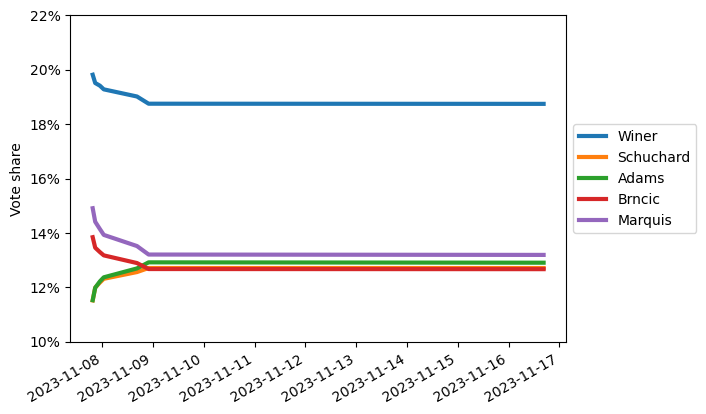

In [9]:
vote_share_df = boulder_cc_vote_shares.loc[[6,7,8,9,10],date_cols].T

vote_share_df.columns = ['Winer','Schuchard','Adams','Brncic','Marquis']

ax = vote_share_df.plot(lw=3)
ax.legend(loc='center left',bbox_to_anchor=(1,.5))
ax.set_ylabel('Vote share')
ax.set_ylim((0.1,0.22))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1,0))

## Estimate a simple model

We estimate a simple linear regression model. The outcome variable (Y) is a candidate's vote share. The input variable (X) is the number of ballots cast in the first round of the mayor's race. This is not an ideal comparison: some voters may have selected council candidates but not mayoral candidates and *vice versa*. However, because voters can select up to four candidates in the City Council race, the vote total is inflated (~113,000 "votes" cast for City Council from ~33,000 ballots).

Our goal is to estimate a candidate's vote share as a function of the number of ballots cast. Thus we use the first round mayoral votes as an imperfect proxy for all the ballots cast.

In [10]:
# X - number of votes cast
total_mayor_ballots.tolist()

[14914, 19821, 23995, 26486, 29517, 32434, 32893]

In [11]:
# Y - share of votes received
boulder_cc_vote_shares.loc[7,date_cols].values.tolist()

[0.11520097395803611,
 0.11992715174807124,
 0.12177156955055242,
 0.1231575641400522,
 0.12563255895742562,
 0.12711826514643415,
 0.1271134866245072]

Estimate a linear regression model for Schuchard's vote share as a function of first-round mayor ballots.

In [12]:
schuchard_model = stats.linregress(
    x = total_mayor_ballots.tolist(),
    y = boulder_cc_vote_shares.loc[7,date_cols].tolist()
)

schuchard_model

LinregressResult(slope=6.456689679985916e-07, intercept=0.1062374879638932, rvalue=0.9932105363760907, pvalue=7.268772067087654e-06, stderr=3.382033567277862e-08, intercept_stderr=0.0008945951190914846)

Estimate a linear regression model for Brncic's vote share as a function of first-round mayor ballots.

In [13]:
brncic_model = stats.linregress(
    x = total_mayor_ballots.tolist(),
    y = boulder_cc_vote_shares.loc[9,date_cols].tolist()
)

brncic_model

LinregressResult(slope=-6.451959059288412e-07, intercept=0.14804738652237967, rvalue=-0.9935564279549699, pvalue=6.37925208375423e-06, stderr=3.291483437895958e-08, intercept_stderr=0.0008706433450576883)

Visualize the relationship.

In [44]:
modeling_df = pd.DataFrame({
    'Ballots':total_mayor_ballots.tolist(),
    'Schuchard':boulder_cc_vote_shares.loc[7,date_cols].tolist(),
    'Brncic':boulder_cc_vote_shares.loc[9,date_cols].tolist()
})

modeling_df

,Ballots,Schuchard,Brncic
0,14914,0.115201,0.138447
1,19821,0.119927,0.134583
2,23995,0.121772,0.132975
3,26486,0.123158,0.131767
4,29517,0.125633,0.128944
5,32434,0.127118,0.126743
6,32893,0.127113,0.126699


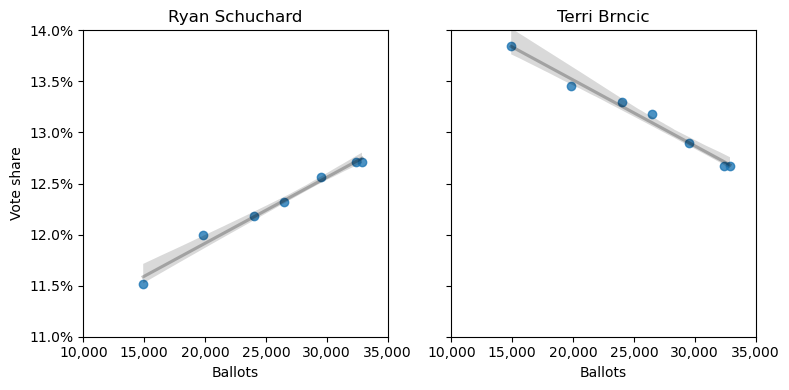

In [45]:
f,axs = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize = (8,4),
    sharey = True,
    subplot_kw = {'ylim':(.11,.14),'xlim':(10000,35000)})

sb.regplot(
    data = modeling_df,
    x = 'Ballots', 
    y = 'Schuchard',
    ax = axs[0],
    line_kws = {'color':'k','alpha':.25}
)

sb.regplot(
    data = modeling_df,
    x = 'Ballots', 
    y = 'Brncic',
    ax = axs[1],
    line_kws = {'color':'k','alpha':.25}
)

axs[0].set_title('Ryan Schuchard')
axs[1].set_title('Terri Brncic')

axs[0].set_ylabel('Vote share')
axs[1].set_ylabel(None)
axs[0].yaxis.set_major_formatter(ticker.PercentFormatter(1,1))

axs[0].xaxis.set_major_locator(ticker.MultipleLocator(5000))
axs[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

axs[1].xaxis.set_major_locator(ticker.MultipleLocator(5000))
axs[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

f.tight_layout()
f.savefig('voteshare_schuchard_brncic.png',bbox_inches='tight')

Estimate a model assuming 33,000 mayoral ballots.

In [29]:
total_ballots_cast = 33000

schuchard_estimate = schuchard_model.intercept + schuchard_model.slope * total_ballots_cast
brncic_estimate = brncic_model.intercept + brncic_model.slope * total_ballots_cast

diff = (schuchard_estimate - brncic_estimate) * total_ballots_cast

result_string = "If there are {0:,} ballots cast,\n\tSchuchard's estimated vote share will be: {1:.2%}\n\tBrncic's estimated vote share will be: {2:.2%}\n\tA difference of {3:,.0f} votes."
print(result_string.format(total_ballots_cast,schuchard_estimate,brncic_estimate,diff))

If there are 33,000 ballots cast,
	Schuchard's estimated vote share will be: 12.75%
	Brncic's estimated vote share will be: 12.68%
	A difference of 26 votes.


## Evaluate model performance

Let's evaluate the model's performance by comparing its predictions for the exact number of (mayoral) ballots cast against the observed vote shares.

In [47]:
performance_d = {}

X_ballots = total_mayor_ballots

for i in range(6,16):
    name = boulder_cc_vote_shares.loc[i,'Race / Candidate']
    
    y_candidate = boulder_cc_vote_shares.loc[i,date_cols].tolist()
    model = stats.linregress(X_ballots,y_candidate)

    performance_d[name] = model.slope * total_mayor_ballots.tolist()[-1] + model.intercept

pd.Series(performance_d)

Tara Winer        0.187953
Ryan Schuchard    0.127475
Taishya Adams     0.129253
Terri Brncic      0.126825
Tina Marquis      0.132153
Waylon Lewis      0.078255
Jenny Robins      0.098653
Silas Atkins      0.059831
Jacques Decalo    0.029087
Aaron Neyer       0.030515
dtype: float64

Combine with the actual results and compute the difference between predicted and actual.

In [48]:
actual = boulder_cc_vote_shares.loc[:,['Race / Candidate',date_cols[-1]]]
actual.set_index('Race / Candidate',inplace=True)

evaluation_df = pd.DataFrame({
    'Predicted':pd.Series(performance_d),
    'Actual':actual[date_cols[-1]]
})

evaluation_df['Difference'] = evaluation_df['Predicted'] - evaluation_df['Actual']
evaluation_df.sort_values('Actual',ascending=False).style.format('{:,.2%}'.format)

,Predicted,Actual,Difference
Tara Winer,18.80%,18.75%,0.05%
Tina Marquis,13.22%,13.19%,0.02%
Taishya Adams,12.93%,12.91%,0.02%
Ryan Schuchard,12.75%,12.71%,0.04%
Terri Brncic,12.68%,12.67%,0.01%
Jenny Robins,9.87%,9.92%,-0.05%
Waylon Lewis,7.83%,7.82%,0.01%
Silas Atkins,5.98%,6.02%,-0.04%
Aaron Neyer,3.05%,3.07%,-0.02%
Jacques Decalo,2.91%,2.94%,-0.03%


## Sample from model

There are standard errors on both the slope and intercept estimates. Sample from a normal distribution around each's estimates.

In [33]:
sample_size = 10000

X_ballots = total_mayor_ballots

estimates_d = {}

for i in range(6,16):
    name = boulder_cc_vote_shares.loc[i,'Race / Candidate']
    
    y_candidate = boulder_cc_vote_shares.loc[i,date_cols].tolist()
    model = stats.linregress(X_ballots,y_candidate)

    # Sample from standard errors
    slopes = np.random.normal(size=sample_size) * model.stderr + model.slope
    intercepts = np.random.normal(size=sample_size) * model.intercept_stderr + model.intercept
    estimates_d[name] = slopes * total_ballots_cast + intercepts

estimates_df = pd.DataFrame(estimates_d)
estimates_df.head()

,Tara Winer,Ryan Schuchard,Taishya Adams,Terri Brncic,Tina Marquis,Waylon Lewis,Jenny Robins,Silas Atkins,Jacques Decalo,Aaron Neyer
0,0.185888,0.126513,0.129722,0.127397,0.130535,0.079148,0.099101,0.056565,0.029210,0.029445
1,0.187964,0.126625,0.130667,0.125834,0.131409,0.077648,0.098186,0.058724,0.026830,0.030526
2,0.188730,0.126810,0.130883,0.125572,0.133533,0.078675,0.096712,0.060622,0.028964,0.029767
3,0.187795,0.126560,0.128191,0.127217,0.132496,0.077916,0.097005,0.061238,0.027340,0.031543
4,0.192737,0.128741,0.127258,0.128619,0.131894,0.077917,0.098189,0.056022,0.027950,0.029160


Plot the distribution of model estimates of vote shares for each candidate from `estimates_df`.

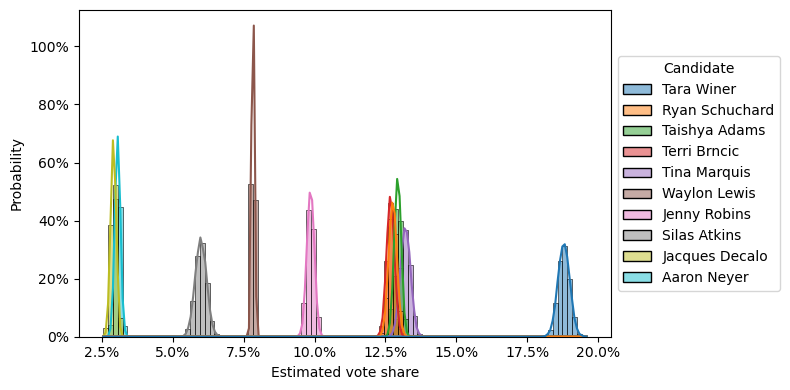

In [34]:
_df = estimates_df.stack().reset_index(level=1)
_df.columns = ['Candidate','Estimate']

f,ax = plt.subplots(figsize=(8,4))

sb.histplot(
    data = _df,
    x = 'Estimate',
    hue = 'Candidate',
    stat = 'probability',
    common_norm = False,
    bins = 100,
    kde = True,
    palette = 'tab10',
    ax = ax
)

sb.move_legend(ax,'center left',bbox_to_anchor=(1,.5))

ax.set_xlabel('Estimated vote share')
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))

f.tight_layout()
# f.savefig('all_races.png')

Zoom in and focus on the four closest races between Adams, Brncic, Marquis, and Schuchard.

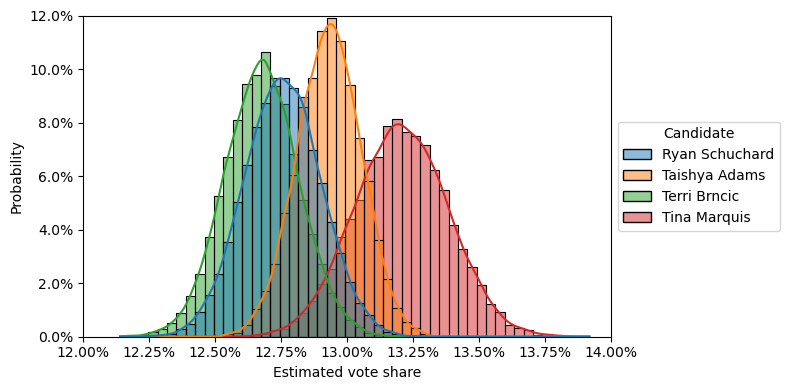

In [35]:
f,ax = plt.subplots(figsize=(8,4))

sb.histplot(
    data = _df[_df['Candidate'].isin(['Ryan Schuchard','Taishya Adams','Terri Brncic','Tina Marquis'])],
    x = 'Estimate',
    hue = 'Candidate',
    stat = 'probability',
    common_norm = False,
    bins = 50,
    kde = True,
    palette = 'tab10',
    ax = ax
)

sb.move_legend(ax,'center left',bbox_to_anchor=(1,.5))

ax.set_xlabel('Estimated vote share')
ax.set_xlim((.12,.14))
ax.set_ylim((0,.12))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))

f.tight_layout()
# f.savefig('close_races.png')

What percentage of the time does Schuchard beat Brncic?

In [36]:
(estimates_df['Ryan Schuchard'] > estimates_df['Terri Brncic']).sum() / sample_size

0.6546

### Grid search

Use the standard errors around the estimates to extrapolate worst case to best case models assuming that the regression models' slopes for Scuchard and Brncic are inversely related with each other. In a best case scenario, if Schuchard's goes up, Brncic's goes down a similar amount. In a worst case scenario, if Schchard's goes down, Brncic's goes up a similar amount.

Perform a grid search over the worst case to best case model scenarios and different amounts of voter turnout.

In [37]:
steps = 25

# Worst case to best case model slopes for Schuchard
schuchard_slopes = np.linspace(schuchard_model.slope - schuchard_model.stderr, schuchard_model.slope + schuchard_model.stderr, steps)

# Best case to worst case model slopes for Brncic
brncic_slopes = np.linspace(brncic_model.slope + brncic_model.stderr, brncic_model.slope - brncic_model.stderr, steps)

# Mayoral ballot counts in the range between 32,500 and 33,500
ballots = np.linspace(32500,33500,steps)

# Empty container to store results
grid_search_d = {}

# For each model and each number of ballots, estimate how much Schuchard beats Brncic by
for i in range(steps):

    grid_search_d[i] = {}
        
    for b in ballots:
        schuchard_share = schuchard_slopes[i] * b + schuchard_model.intercept
        brncic_share = brncic_slopes[i] * b + brncic_model.intercept
        grid_search_d[i][b] = schuchard_share - brncic_share

Visualize as a heatmap.

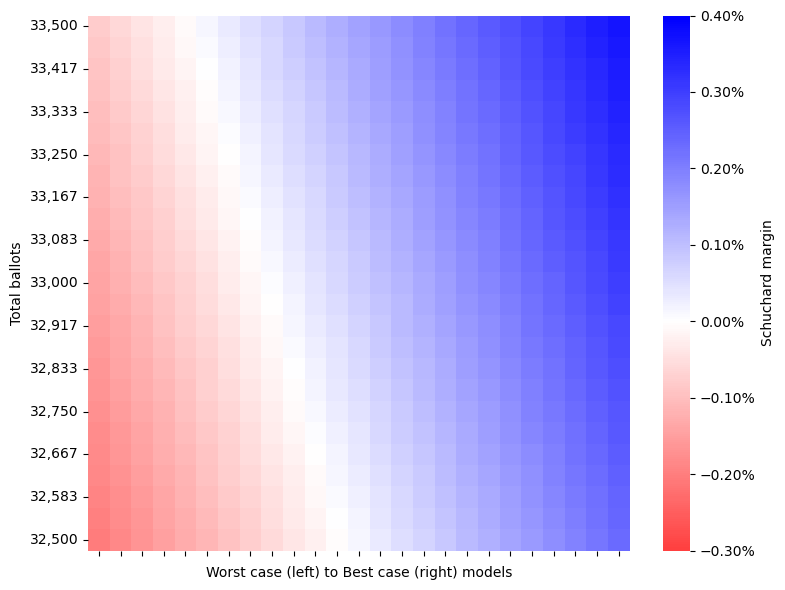

In [38]:
f,ax = plt.subplots(figsize=(8,6))

sb.heatmap(
    data = pd.DataFrame(grid_search_d),
    cmap = 'bwr_r',
    vmin = -0.003,
    vmax = 0.004,
    center = 0,
    cbar_kws = {'label':'Schuchard margin','format':ticker.PercentFormatter(1)},
    yticklabels = 2,
    ax = ax
)

ax.set_xticklabels([])
ax.set_yticklabels(["{:,.0f}".format(float(tick._text)) for tick in ax.get_yticklabels()])
ax.set_xlabel('Worst case (left) to Best case (right) models')
ax.set_ylabel('Total ballots')
ax.invert_yaxis()

f.tight_layout()
# f.savefig('model_grid_search.png',bbox_inches='tight')

In how many scenarios from this grid search does Schuchard have a positive margin (wins)?

In [39]:
_s = pd.DataFrame(grid_search_d).stack()
len(_s[_s > 0]) / len(_s)

0.672